In [17]:
import os, sys, wave, struct

import numpy as np
import pyaudio
import pandas as pd
import matplotlib.pyplot as plt

from copy import deepcopy
from math import ceil
from scipy.io.wavfile import write
from IPython.display import Audio
from scipy.signal import stft, istft

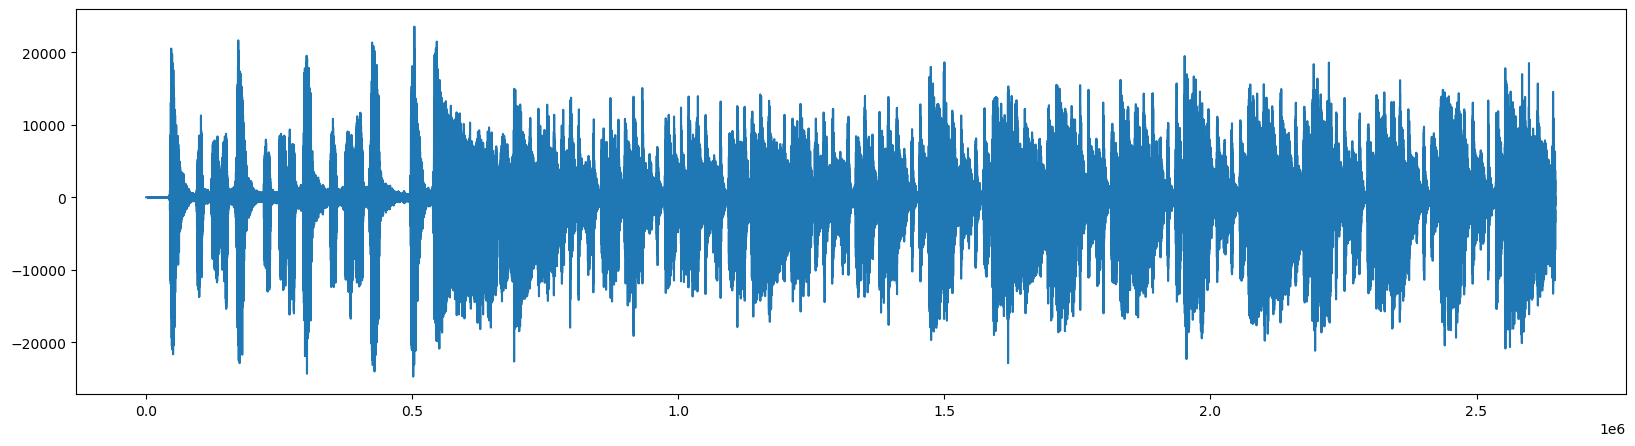

In [8]:
# read wave file
def read_wave(filename):
    with wave.open(filename, 'rb') as wf:
        Fs = int(wf.getframerate())
        num_frames = wf.getnframes()
        num_channels = wf.getnchannels()
        sample_width = wf.getsampwidth()
        frames = wf.readframes(num_frames)
        fmt = '<{n}{t}'.format(n=num_frames * num_channels, t='h' if sample_width == 2 else 'B')
        data = struct.unpack(fmt, frames)
        return Fs, np.array(data)
    

Fs, x = read_wave('salsa.wav')

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(x)
plt.show()


OLA

In [2]:
def ola(w = None,hop = None,Nb = 10): 
# function output = ola(w,hop,Nb)
# realise l'addition-recouvrement de la fenetre w,
# avec un décalage hop et un nombre Nb de fenetres.
# par defaut Nb = 10;
    
    w = w[:, np.newaxis]
    N = len(w)
    output = np.zeros(((Nb - 1) * hop + N,1)) # réserve l'espace memoire
    
    for k in np.arange(0,Nb).reshape(-1):
        deb = k* hop
        fin = deb + N
        output[np.arange(deb,fin)] = output[np.arange(deb,fin)] + w # OLA
    
    return output

TFCT

In [9]:
N = x.shape[0] # % longueur du signal
Nw = 512
w = np.hanning(Nw) # définition de la fenetre d'analyse
ws = w.copy; # définition de la fenêtre de synthèse
R = Nw/4 # incrément sur les temps d'analyse, appelé hop size, t_a=uR
M = 512 # ordre de la tfd
L = M/2+1
affich = 0 ; # pour affichage du spectrogramme, 0 pour
             # pour faire analyse/modif/synthèse sans affichage
             # note: cf. spectrogram sous Matlab
Nt = np.rint((N - Nw) / R) # calcul du nombre de tfd à calculer
Nt = Nt.astype(int)
y = np.zeros((N,1)) # signal de synthèse

if affich:
    Xtilde = np.zeros((M,Nt),dtype=complex)

In [10]:
for u in np.arange(0,Nt).reshape(-1): # boucle sur les trames
    deb = u * R + 1 # début de trame
    fin = deb + Nw # fin de trame
    tx = np.multiply(x[np.arange(deb.astype(int),fin.astype(int))],w) # calcul de la trame 
    X = np.fft.fft(tx,M) # tfd à l'instant b
    if affich:
        Xtilde[:,u] = X
    # opérations de transformation (sur la partie \nu > 0)
    # ....
    Y = X.copy
    # fin des opérations de transformation
    # resynthèse
    # overlap add

def extents(f):
  delta = f[1] - f[0]
  return [f[0] - delta/2, f[-1] + delta/2]

# 1 TFCT
## 1.1 Généralités

It could be written as a convolution between $x(n)e^{-2\pi j fn}$ and $w(n)$. If the window $w(n)$ is even, it is a Type 1 FIR filter. If the window $w(n)$ is odd, it is a Type 3 FIR filter.

# 2 Étirement temporel
## a

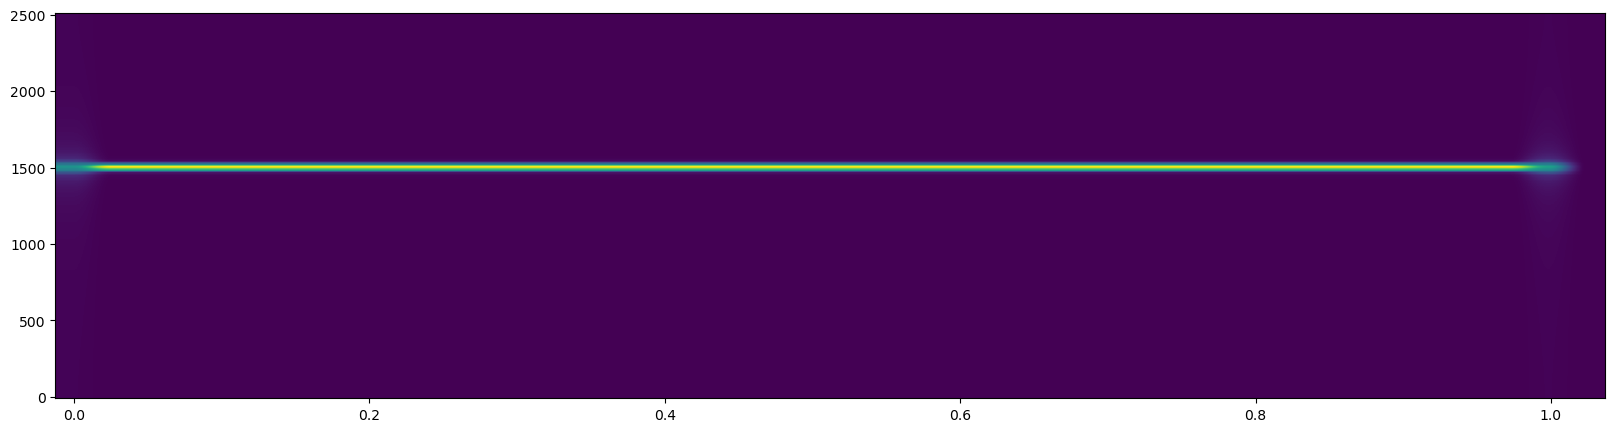

-3.035281157033215


In [65]:
win_len = 256
Fs = 5e3
f0 = 1e3
time_scale = np.arange(0, 1, 1/Fs)

x_f0 = np.exp(1j * 2 * np.pi * f0 * time_scale)

w = np.hanning(win_len)

# STFT
frequencies, times, Zxx = stft(np.real(x_f0), window=w, fs=Fs, nfft=256, return_onesided=True)

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.imshow(np.abs(Zxx), extent=extents(times) + extents(frequencies), aspect='auto')
plt.show()

X_b1_f1 = Zxx[1, 10]
X_b2_f2 = Zxx[-2, 11]

print(np.angle(X_b1_f1)-np.angle(X_b2_f2))

In [66]:
delta_f =  frequencies[1] - f0

## b

$R < \frac{1}{\Delta_f}$

## c

$R < \frac{2}{F_s}$

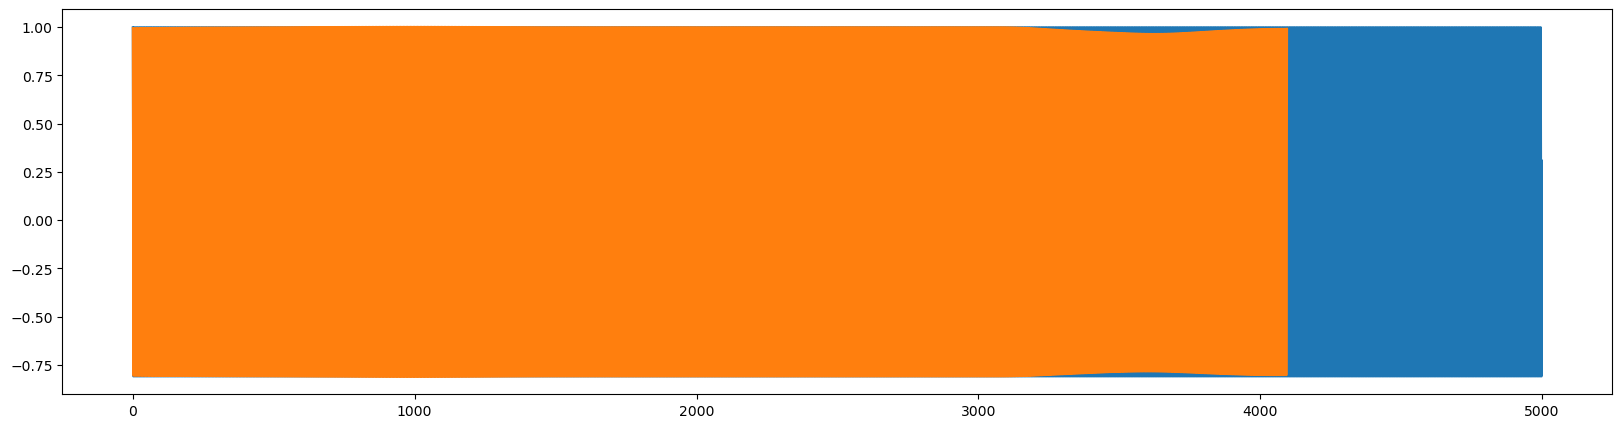

In [74]:
import librosa
import numpy as np

def pitch_shift(y, sr, n_steps):

    # 短時傅立葉變換
    S = librosa.stft(y)

    # 使用相位聲碼器進行音高偏移
    S_shifted = librosa.phase_vocoder(S, rate=2**(n_steps / 12), hop_length=512)

    # 逆短時傅立葉變換
    y_shifted = librosa.istft(S_shifted)

    return y_shifted

# 載入音訊
# sr, y = read_wave('salsa.wav')
# y = y.astype(np.float32) / np.max(np.abs(y))  # Convert to floating-point and normalize

# # 進行音高偏移
# y_shifted = pitch_shift(y, sr, n_steps=2)  # 升高兩個半音

sr = 5000
time_scale = np.arange(0, 1, 1/sr)

y = np.exp(1j * 2 * np.pi * 1000 * time_scale)
y = np.real(y)
y = y.astype(np.float32) / np.max(np.abs(y))
y_shifted = pitch_shift(y, sr, n_steps=2)

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(y)
ax.plot(y_shifted)
plt.show()
